# **RAÍZES DE EQUAÇÕES E SISTEMAS**

JULIA também permite calcular raízes de equações lineares e não lineares através o comando **solve**(equacao,variavel)

In [13]:
using SymPy

@syms x

(x,)

#### RAIZ DE UMA EXPRESSÃO####

In [14]:
SymPy.solve(x^2-3*x-2,x)

2-element Array{SymPy.Sym,1}
[       ____ ]
[ 3   \/ 17  ]
[ - + ------ ]
[ 2     2    ]
[            ]
[    ____    ]
[  \/ 17    3]
[- ------ + -]
[    2      2]

#### RAIZ DE UMA FUNÇÃO/EXPRESSÃO ####

In [15]:
f(x) = x^2-3*x-2

f (generic function with 1 method)

In [16]:
SymPy.solve(f(x),x)

2-element Array{SymPy.Sym,1}
[       ____ ]
[ 3   \/ 17  ]
[ - + ------ ]
[ 2     2    ]
[            ]
[    ____    ]
[  \/ 17    3]
[- ------ + -]
[    2      2]

Ou ainda

In [5]:
resultado = SymPy.solve(x^2-3*x-2,x)

2-element Array{SymPy.Sym,1}
[       ____ ]
[ 3   \/ 17  ]
[ - + ------ ]
[ 2     2    ]
[            ]
[    ____    ]
[  \/ 17    3]
[- ------ + -]
[    2      2]

O resultado de "resultado" é um vetor coluna que apresenta os valores de X1 e X2. Dessa forma, podemos acessar somente o valor de X1 ou de X2


In [6]:
display(resultado[1])

display(resultado[2])

      ____
3   \/ 17 
- + ------
2     2   

    ____    
  \/ 17    3
- ------ + -
    2      2

Ou com o comando print

In [7]:
print("Resultado de X1: ",(resultado[1]),". Resultado de X2: ",resultado[2])

Resultado de X1: 3/2 + sqrt(17)/2. Resultado de X2: -sqrt(17)/2 + 3/2

*** ATENÇÃO! O COMANDO SOLVE() não resolve todo tipo de equação. Veja o exemplo abaixo:***


In [1]:
t(x) =  x - x*cos(x)*exp(x)

t (generic function with 1 method)

In [9]:
solucao = SymPy.solve(t(x),x)

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.NotImplementedError'>
NotImplementedError('multiple generators [x, cos(x), exp(x)]\nNo algorithms are implemented to solve equation -x*exp(x)*cos(x) + x',)
  File "/usr/local/lib/python2.7/dist-packages/sympy/solvers/solvers.py", line 909, in solve
    solution = _solve(f[0], *symbols, **flags)
  File "/usr/local/lib/python2.7/dist-packages/sympy/solvers/solvers.py", line 1414, in _solve
    "\nNo algorithms are implemented to solve equation %s" % f)

while loading In[9], in expression starting on line 1

Como podemos observar, o comando ** solve()**
não resolveu a equação. Neste caso temos que usar métodos de aproximação numérica para encontrar valores que satisfação uma certa restrição. Um desses métodos é o "SymPy.nsolve"(numeric solve). Sintaxe:

** SymPy.nsolve(função,variavel_independente, valor)**, sendo "valor", o valor de chute da raiz a ser encontrada. 

Outro método é através do pacote ** Roots** (Pkg.add("Roots")). A sintaxe é: 

** Roots(função,valor)** sendo "valor", o valor de chute da raiz a ser encontrada.

Para encontrar um valor próximo da raiz, podemos "chutar" valores ou obter com precisão por meio de um gráfico. Use o Gadfly para criar o gráfico e poder ampliar a imagem, assim será posível ver os pontos de cruzamento do eixo x

In [10]:
using SymPy
using Gadfly

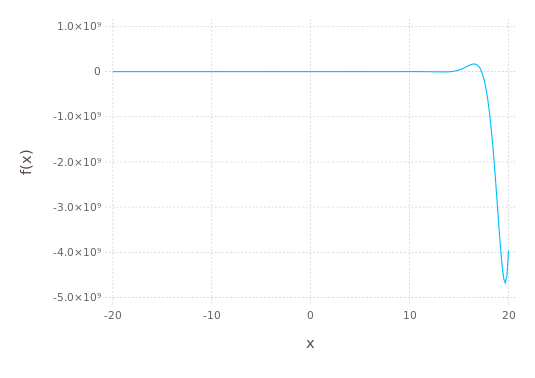

In [11]:
Gadfly.plot(x-> x - x*cos(x)*exp(x), -20, 20)

In [12]:
# para realizar o calculo, é interessante resetar as variáveis
# e escrever a função novamente ou escrever a função com outra variável
# pois pode ter sido atribuído valores para a variável "x" e assim ocorre erro. 

workspace()

In [1]:
using SymPy

@syms x

(x,)

In [104]:
y(x)  = x - x*cos(x)*exp(x)

y (generic function with 1 method)

In [120]:
SymPy.nsolve(y(x), 12), SymPy.nsolve(y(x), 14), SymPy.nsolve(y(x), 18)

(10.995591063064381,14.137166216206293,17.278759626071672)

In [16]:
#testando

y(17.278759626071672),   y(14.137166216206293)  ,   y(10.995591063064381)

(7.106810429036159e-7,2.358449435746479e-9,1.2816769867640687e-10)

Ou então usar o pacote Roots. Pkg.add("Roots"):

** fzero(funcao,valor_inicial)**

In [5]:
using Roots

fzero(y,18),  fzero(y,14),   fzero(y,12)

(17.278759626071672,14.137166216206293,10.995591063064381)

Testando vários valores em um vetor

In [18]:
[fzero(y, x) for x in [5, 10, 12, 17, 19, 21]]

6-element Array{Any,1}:
  4.72129
  7.85359
 10.9956 
 17.2788 
 17.2788 
 20.4204 

#### RAIZ DE UM POLINOMIO (SÓ SERVE PARA POLINOMIOS)####

Dado um polinomio na forma: $ p = x^2 + 0x^1 - 4$

In [139]:
# o vetor [1,1] representa a multiplicidade da raiz

poli = [-4, 0 , 1];

Roots.multroot(poli)

([2.0000000000000004,-1.9999999999999996],[1,1])

In [143]:
# o vetor [1,1] representa a multiplicidade da raiz

SymPy.polyroots(x^2 - 4)

Dict{Any,Any} with 2 entries:
  -2 => 1
  2  => 1

In [142]:
SymPy.nroots(x^2 - 4)

2-element Array{SymPy.Sym,1}
[-2.0]
[    ]
[2.0 ]

2-element Array{Any,1}:
  1
 -4

#### RAIZ INEQUAÇÃO ####

In [114]:
ineq1 = x^2 + x  >= 5

 2         
x  + x >= 5

In [115]:
solve(ineq1,x)

   /             /   /             ____                 \     /        ____   
   |             |   |           \/ 21    1             |     |  1   \/ 21    
And|im(x) = 0, Or|And|re(x) <= - ------ - -, -oo < re(x)|, And|- - + ------ <=
   \             \   \             2      2             /     \  2     2      

                  \\\
                  |||
 re(x), re(x) < oo|||
                  ///

### SISTEMAS DE EQUAÇÕES LINEARES E NÃO LINEARES ##

* #### SISTEMAS DE EQUAÇÕES LINEARES####

In [3]:
using SymPy

@syms x,y

(x,y)

In [4]:
eql1 = 2*x+3*y-6

eql2 = 3*x-4*y-12

display(eql1)
display(eql2)

2*x + 3*y - 6

3*x - 4*y - 12

In [5]:
SymPy.solve([eql1 ,eql2 ],[x , y]) 

Dict{SymPy.Sym,SymPy.Sym} with 2 entries:
  x => 60/17
  y => -6/17

* #### SISTEMAS DE EQUAÇÕES NÃO LINEARES####

Dado o sistema abaixo:

$xy -x =0$

$-x^2 - 8y  =2$

Para esta tarefa, utilizaremos os pacotes **Sundials** e **NLsolve**. O pacote NLsolve permite resolver (não é todos os casos) sem a entrada do Jacobiano

In [7]:
using Sundials
using NLsolve

* ** Usando o Sundials**

Sintaxe:
```julia
    function nome_function(variavel, funcao)
        f[1] = a*x[1] + b*x[2] + ... + k 
    
        f[2] = a*x[1] + b*x[2] + ... + k
    end
    
    Sundials.kinsol(nome_function, vetor_inicial)
```    
Sendo a,b,... e k constantes. x[1] corresponde a primeira variável e x[2] a segunda variável, e assim por diante.

In [14]:
function sistema_SD(x, fsd)
    fsd[1] = x[2]*x[1] -2*x[1]
    
    fsd[2] = -x[1]^2 -8*x[2] - 2
end

Sundials.kinsol(sistema_SD, [1.0,-1.0])

2-element Array{Float64,1}:
 -1.36885e-12
 -0.25       

* **Usando o NLsolve**

Sintaxe:
```julia
    function nome_function(variavel, funcao)
        f[1] = a*x[1] + b*x[2] + ... + k 
    
        f[2] = a*x[1] + b*x[2] + ... + k
    end
    
    nlsolve(nome_function,  vetor_inicial)
```

Sendo a,b,... e k constantes. x[1] corresponde a primeira variável e x[2] a segunda variável, e assim por diante.

In [15]:
function sistema_NL(x, fnl)
    fnl[1] = x[2]*x[1] -2*x[1]
    
    fnl[2] = -x[1]^2 -8*x[2] - 2
end

nlsolve(sistema_NL,  [ 1.0;-1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0,-1.0]
 * Zero: [-4.913342549115428e-11,-0.24999999992189917]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

### MÁXIMOS E MÍNIMOS DE FUNÇÕES ++colocar depois de derivada ###

In [16]:
using SymPy

@syms x,y

(x,y)

In [26]:
f(x) = x^3 - 2x - 1/2

f (generic function with 1 method)

In [27]:
# encontra o minimo e máximo de uma função

extrema(map(f,(-1.5:0.1:1.5)))

(-1.588,0.5880000000000001)

In [28]:
SymPy.diff(f(x))

   2    
3*x  - 2

$a_2x^2 + a_1x + a_0$ as $b_2(x-c)^2 + b_1(x-c) + b_0$ 

In [29]:
Area(x, y) = x*y + pi*(x/2)^2/2

# devemos resolver a equação em relação a y, de tal forma que teremos y em função de x
# use y0 para ver o resultado

y0 = solve(2*y + x + pi/2*x - 20, y)


# Substituir o "y" da função Área por y0 que vale −1.28539816339745x+10.0, derivar em relação a x
# e resolver a raiz (Area ==0).
# o valor dado de x será o valor extremo da função.
# use Area(x,y0) para ver a função substituida

 solve(diff(Area(x, y0)), x)

LoadError: LoadError: MethodError: `*` has no method matching *(::Int64, ::Function)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *(::Real, !Matched::Complex{Bool})
  *(::Real, !Matched::Complex{T<:Real})
  ...
while loading In[29], in expression starting on line 6